In [1]:
# Parameters
global_seed = 88
save_results = False
benchmark_settings = {"benchmark_name": "pMNIST_via_torch", "difficulty": "standard", "num_tasks": 10, "train_percentage": 0.3, "num_val_benchmarks": 5, "batch_size": 128}
method_settings = {"method_name": "GroHess", "grow_from": "output", "hessian_percentile": 95, "grad_percentile": 95, "num_inputs": 784, "num_hidden_root": 200, "num_outputs": 10, "loss_name": "CE", "optimizer_name": "Adam"}
HPO_settings = {"HPO_name": "greedy_HPO", "n_trials": 8, "lr": [1e-05, 0.002], "num_epochs": [2, 6]}
visualization_settings = {"savefig": True, "visualize_accs_matrix": True, "visualize_avg_acc_curve": True, "visualize_best_params": True, "visualize_val_accs_matrix": True, "visualize_accuracy_through_benchmarks": True, "visualize_violin": True}


In [2]:
# Comment the following cell if running through the command :
# papermill runnable_HPO.ipynb executed_HPO.ipynb -f params_for_HPO.yaml --kernel jupyter.jax_env

global_seed = 88
save_results = False
# Parameters specfific to the benchmark
benchmark_settings = {"benchmark_name" : "pMNIST_via_torch",
                      "difficulty" : "standard",
                      "num_tasks" : 2,
                      "train_percentage" : 0.1,
                      "num_val_benchmarks" : 1,
                      "batch_size" : 128}

# Parameters specific to the method
method_settings = {"method_name" : "GroHess",
                   "grow_from" : "output",
                   "hessian_percentile" : 95,
                   "grad_percentile" : 95,
                   "num_inputs" : 28*28,
                   "num_hidden_root" : 100,
                   "num_outputs" : 10,
                   "loss_name" : "CE",
                   "optimizer_name" : "Adam"}

# Parameters specific to HPO
HPO_settings = {"HPO_name" : "greedy_HPO",
                "n_trials" : 1,
                "lr" : (5e-5, 2e-3),
                "num_epochs" : (2, 2),
                #"ewc_lambda" : (400,400)
                #"lwf_alpha" : None, #(0.1, 0.9),
                #"lwf_temperature" : None} #(1, 3)
                }

# Parameters specific to the visualization
visualization_settings = {"savefig" : False,
                          "visualize_accs_matrix" : True,
                          "visualize_avg_acc_curve" : True,
                          "visualize_best_params" : True,
                          "visualize_val_accs_matrix" : True,
                          "visualize_accuracy_through_benchmarks" : True,
                          "visualize_violin" : True}

In [3]:
import sys
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')

sys.path.append("Methods/" + method_settings["method_name"])
sys.path.append("HPO_lib")
sys.path.append("HPO_lib/benchmark_loaders")


path = os.path.dirname(os.path.abspath("__file__"))
data_path = path + "/data"

## Imports

In [4]:
from HPO_lib.abstract_torch import get_device
from HPO_lib.get_benchmarks import get_benchmarks
from HPO_lib.run_HPO import run_HPO
from HPO_lib.validation import validate
from HPO_lib.visualize import visualize_HPO, visualize_validation

In [5]:
device = get_device(1)

## Get benchmarks

In [6]:
benchmarks_list = get_benchmarks(benchmark_settings, global_seed)

## Run HPO

In [7]:
test_accs_matrix, best_params_list = run_HPO(HPO_settings, method_settings, benchmark_settings, benchmarks_list[0], device, global_seed)

[I 2024-07-16 19:53:23,798] A new study created in memory with name: Search number 1



--------------------------------------------------
LEARNING TASK 1


  0%|                                                                                                                                | 0/4 [00:00<?, ?it/s]

 25%|██████████████████████████████                                                                                          | 1/4 [00:02<00:06,  2.21s/it]

 50%|████████████████████████████████████████████████████████████                                                            | 2/4 [00:04<00:04,  2.12s/it]

 75%|██████████████████████████████████████████████████████████████████████████████████████████                              | 3/4 [00:06<00:02,  2.10s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.08s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.10s/it]

[I 2024-07-16 19:53:36,550] Trial 0 finished with value: 94.39304878048785 and parameters: {'lr': 0.0012986265882125167, 'num_epochs': 4}. Best is trial 0 with value: 94.39304878048785.


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.06s/it]

 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.07s/it]

 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.07s/it]

 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.06s/it]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.06s/it]

[I 2024-07-16 19:53:53,259] Trial 1 finished with value: 94.97649390243913 and parameters: {'lr': 0.0010613993465029565, 'num_epochs': 6}. Best is trial 1 with value: 94.97649390243913.


  0%|                                                                                                                                | 0/5 [00:00<?, ?it/s]

 20%|████████████████████████                                                                                                | 1/5 [00:02<00:08,  2.06s/it]

 40%|████████████████████████████████████████████████                                                                        | 2/5 [00:04<00:06,  2.05s/it]

 60%|████████████████████████████████████████████████████████████████████████                                                | 3/5 [00:06<00:04,  2.06s/it]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████                        | 4/5 [00:08<00:02,  2.05s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.06s/it]

[I 2024-07-16 19:54:07,918] Trial 2 finished with value: 95.12893292682936 and parameters: {'lr': 0.001402982469428301, 'num_epochs': 5}. Best is trial 2 with value: 95.12893292682936.


  0%|                                                                                                                                | 0/3 [00:00<?, ?it/s]

 33%|████████████████████████████████████████                                                                                | 1/3 [00:02<00:04,  2.06s/it]

 67%|████████████████████████████████████████████████████████████████████████████████                                        | 2/3 [00:04<00:02,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:06<00:00,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:06<00:00,  2.06s/it]

[I 2024-07-16 19:54:18,474] Trial 3 finished with value: 93.84975609756096 and parameters: {'lr': 0.0014375033803618875, 'num_epochs': 3}. Best is trial 2 with value: 95.12893292682936.


  0%|                                                                                                                                | 0/4 [00:00<?, ?it/s]

 25%|██████████████████████████████                                                                                          | 1/4 [00:02<00:06,  2.07s/it]

 50%|████████████████████████████████████████████████████████████                                                            | 2/4 [00:04<00:04,  2.06s/it]

 75%|██████████████████████████████████████████████████████████████████████████████████████████                              | 3/4 [00:06<00:02,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.06s/it]

[I 2024-07-16 19:54:31,046] Trial 4 finished with value: 91.40847560975612 and parameters: {'lr': 0.00035855750141480585, 'num_epochs': 4}. Best is trial 2 with value: 95.12893292682936.


  0%|                                                                                                                                | 0/2 [00:00<?, ?it/s]

 50%|████████████████████████████████████████████████████████████                                                            | 1/2 [00:02<00:02,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:04<00:00,  2.05s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:04<00:00,  2.05s/it]

[I 2024-07-16 19:54:39,458] Trial 5 finished with value: 93.47621951219514 and parameters: {'lr': 0.001858189478761739, 'num_epochs': 2}. Best is trial 2 with value: 95.12893292682936.


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.06s/it]

 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.06s/it]

 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.06s/it]

 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.06s/it]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.06s/it]

[I 2024-07-16 19:54:56,183] Trial 6 finished with value: 90.7007926829268 and parameters: {'lr': 0.0001889451674210676, 'num_epochs': 6}. Best is trial 2 with value: 95.12893292682936.


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.06s/it]

 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.06s/it]

 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.06s/it]

 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.06s/it]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.06s/it]

[I 2024-07-16 19:55:12,890] Trial 7 finished with value: 94.82405487804888 and parameters: {'lr': 0.0009763859072011794, 'num_epochs': 6}. Best is trial 2 with value: 95.12893292682936.


  0%|                                                                                                                                | 0/5 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 20%|████████████████████████                                                                                                | 1/5 [00:02<00:08,  2.07s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 40%|████████████████████████████████████████████████                                                                        | 2/5 [00:04<00:06,  2.06s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 60%|████████████████████████████████████████████████████████████████████████                                                | 3/5 [00:06<00:04,  2.06s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 80%|████████████████████████████████████████████████████████████████████████████████████████████████                        | 4/5 [00:08<00:02,  2.06s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.05s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.06s/it]

[I 2024-07-16 19:55:33,529] A new study created in memory with name: Search number 2



--------------------------------------------------
LEARNING TASK 2


  0%|                                                                                                                                | 0/4 [00:00<?, ?it/s]

 25%|██████████████████████████████                                                                                          | 1/4 [00:02<00:06,  2.06s/it]

 50%|████████████████████████████████████████████████████████████                                                            | 2/4 [00:04<00:04,  2.06s/it]

 75%|██████████████████████████████████████████████████████████████████████████████████████████                              | 3/4 [00:06<00:02,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.06s/it]

[I 2024-07-16 19:55:50,524] Trial 0 finished with value: 93.44254573170736 and parameters: {'lr': 0.0012986265882125167, 'num_epochs': 4}. Best is trial 0 with value: 93.44254573170736.


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.08s/it]

 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.07s/it]

 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.07s/it]

 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.06s/it]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.11s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.09s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.09s/it]

[I 2024-07-16 19:56:11,778] Trial 1 finished with value: 93.75935975609755 and parameters: {'lr': 0.0010613993465029565, 'num_epochs': 6}. Best is trial 1 with value: 93.75935975609755.


  0%|                                                                                                                                | 0/5 [00:00<?, ?it/s]

 20%|████████████████████████                                                                                                | 1/5 [00:02<00:08,  2.06s/it]

 40%|████████████████████████████████████████████████                                                                        | 2/5 [00:04<00:06,  2.06s/it]

 60%|████████████████████████████████████████████████████████████████████████                                                | 3/5 [00:06<00:04,  2.06s/it]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████                        | 4/5 [00:08<00:02,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.06s/it]

[I 2024-07-16 19:56:30,822] Trial 2 finished with value: 92.88153963414636 and parameters: {'lr': 0.001402982469428301, 'num_epochs': 5}. Best is trial 1 with value: 93.75935975609755.


  0%|                                                                                                                                | 0/3 [00:00<?, ?it/s]

 33%|████████████████████████████████████████                                                                                | 1/3 [00:02<00:04,  2.07s/it]

 67%|████████████████████████████████████████████████████████████████████████████████                                        | 2/3 [00:04<00:02,  2.07s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:06<00:00,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:06<00:00,  2.06s/it]

[I 2024-07-16 19:56:45,751] Trial 3 finished with value: 93.40919207317074 and parameters: {'lr': 0.0014375033803618875, 'num_epochs': 3}. Best is trial 1 with value: 93.75935975609755.


  0%|                                                                                                                                | 0/4 [00:00<?, ?it/s]

 25%|██████████████████████████████                                                                                          | 1/4 [00:02<00:06,  2.06s/it]

 50%|████████████████████████████████████████████████████████████                                                            | 2/4 [00:04<00:04,  2.06s/it]

 75%|██████████████████████████████████████████████████████████████████████████████████████████                              | 3/4 [00:06<00:02,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.06s/it]

[I 2024-07-16 19:57:02,740] Trial 4 finished with value: 92.74213414634141 and parameters: {'lr': 0.00035855750141480585, 'num_epochs': 4}. Best is trial 1 with value: 93.75935975609755.


  0%|                                                                                                                                | 0/2 [00:00<?, ?it/s]

 50%|████████████████████████████████████████████████████████████                                                            | 1/2 [00:02<00:02,  2.05s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:04<00:00,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:04<00:00,  2.06s/it]

[I 2024-07-16 19:57:15,601] Trial 5 finished with value: 92.63853658536584 and parameters: {'lr': 0.001858189478761739, 'num_epochs': 2}. Best is trial 1 with value: 93.75935975609755.


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.06s/it]

 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.05s/it]

 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.05s/it]

 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.05s/it]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.06s/it]

[I 2024-07-16 19:57:36,961] Trial 6 finished with value: 92.488612804878 and parameters: {'lr': 0.0001889451674210676, 'num_epochs': 6}. Best is trial 1 with value: 93.75935975609755.


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.05s/it]

 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.06s/it]

 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.06s/it]

 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.06s/it]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.06s/it]

[I 2024-07-16 19:57:58,021] Trial 7 finished with value: 93.73070121951221 and parameters: {'lr': 0.0009763859072011794, 'num_epochs': 6}. Best is trial 1 with value: 93.75935975609755.


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.06s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.05s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.05s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.06s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.06s/it]

In and out sizes :
fc1 : in = 784, out = 297
fc2 : in = 297, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.06s/it]

[I 2024-07-16 19:58:20,694] A new study created in memory with name: Search number 3



--------------------------------------------------
LEARNING TASK 3


  0%|                                                                                                                                | 0/4 [00:00<?, ?it/s]

 25%|██████████████████████████████                                                                                          | 1/4 [00:02<00:06,  2.06s/it]

 50%|████████████████████████████████████████████████████████████                                                            | 2/4 [00:04<00:04,  2.06s/it]

 75%|██████████████████████████████████████████████████████████████████████████████████████████                              | 3/4 [00:06<00:02,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.07s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.07s/it]

[I 2024-07-16 19:58:42,073] Trial 0 finished with value: 87.83759146341464 and parameters: {'lr': 0.0012986265882125167, 'num_epochs': 4}. Best is trial 0 with value: 87.83759146341464.


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.06s/it]

 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.07s/it]

 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.07s/it]

 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.07s/it]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.06s/it]

[I 2024-07-16 19:59:07,606] Trial 1 finished with value: 90.24160569105698 and parameters: {'lr': 0.0010613993465029565, 'num_epochs': 6}. Best is trial 1 with value: 90.24160569105698.


  0%|                                                                                                                                | 0/5 [00:00<?, ?it/s]

 20%|████████████████████████                                                                                                | 1/5 [00:02<00:08,  2.06s/it]

 40%|████████████████████████████████████████████████                                                                        | 2/5 [00:04<00:06,  2.07s/it]

 60%|████████████████████████████████████████████████████████████████████████                                                | 3/5 [00:06<00:04,  2.07s/it]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████                        | 4/5 [00:08<00:02,  2.07s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.07s/it]

[I 2024-07-16 19:59:31,030] Trial 2 finished with value: 90.83141260162604 and parameters: {'lr': 0.001402982469428301, 'num_epochs': 5}. Best is trial 2 with value: 90.83141260162604.


  0%|                                                                                                                                | 0/3 [00:00<?, ?it/s]

 33%|████████████████████████████████████████                                                                                | 1/3 [00:02<00:04,  2.06s/it]

 67%|████████████████████████████████████████████████████████████████████████████████                                        | 2/3 [00:04<00:02,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:06<00:00,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:06<00:00,  2.06s/it]

[I 2024-07-16 19:59:50,223] Trial 3 finished with value: 88.62211382113826 and parameters: {'lr': 0.0014375033803618875, 'num_epochs': 3}. Best is trial 2 with value: 90.83141260162604.


  0%|                                                                                                                                | 0/4 [00:00<?, ?it/s]

 25%|██████████████████████████████                                                                                          | 1/4 [00:02<00:06,  2.07s/it]

 50%|████████████████████████████████████████████████████████████                                                            | 2/4 [00:04<00:04,  2.07s/it]

 75%|██████████████████████████████████████████████████████████████████████████████████████████                              | 3/4 [00:06<00:02,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.06s/it]

[I 2024-07-16 20:00:11,640] Trial 4 finished with value: 90.0268495934959 and parameters: {'lr': 0.00035855750141480585, 'num_epochs': 4}. Best is trial 2 with value: 90.83141260162604.


  0%|                                                                                                                                | 0/2 [00:00<?, ?it/s]

 50%|████████████████████████████████████████████████████████████                                                            | 1/2 [00:02<00:02,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:04<00:00,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:04<00:00,  2.06s/it]

[I 2024-07-16 20:00:28,909] Trial 5 finished with value: 87.4978556910569 and parameters: {'lr': 0.001858189478761739, 'num_epochs': 2}. Best is trial 2 with value: 90.83141260162604.


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.06s/it]

 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.06s/it]

 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.06s/it]

 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.06s/it]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.06s/it]

[I 2024-07-16 20:00:54,427] Trial 6 finished with value: 82.10493902439022 and parameters: {'lr': 0.0001889451674210676, 'num_epochs': 6}. Best is trial 2 with value: 90.83141260162604.


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.06s/it]

 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.07s/it]

 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.07s/it]

 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.07s/it]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.06s/it]

[I 2024-07-16 20:01:19,970] Trial 7 finished with value: 90.75111788617892 and parameters: {'lr': 0.0009763859072011794, 'num_epochs': 6}. Best is trial 2 with value: 90.83141260162604.


  0%|                                                                                                                                | 0/5 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 297
fc2 : in = 297, out = 200
fc3 : in = 200, out = 10


 20%|████████████████████████                                                                                                | 1/5 [00:02<00:08,  2.07s/it]

In and out sizes :
fc1 : in = 784, out = 297
fc2 : in = 297, out = 200
fc3 : in = 200, out = 10


 40%|████████████████████████████████████████████████                                                                        | 2/5 [00:04<00:06,  2.08s/it]

In and out sizes :
fc1 : in = 784, out = 459
fc2 : in = 459, out = 200
fc3 : in = 200, out = 10


 60%|████████████████████████████████████████████████████████████████████████                                                | 3/5 [00:06<00:04,  2.08s/it]

In and out sizes :
fc1 : in = 784, out = 459
fc2 : in = 459, out = 200
fc3 : in = 200, out = 10


 80%|████████████████████████████████████████████████████████████████████████████████████████████████                        | 4/5 [00:08<00:02,  2.08s/it]

In and out sizes :
fc1 : in = 784, out = 697
fc2 : in = 697, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.08s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.08s/it]

[I 2024-07-16 20:01:40,786] A new study created in memory with name: Search number 4



--------------------------------------------------
LEARNING TASK 4


  0%|                                                                                                                                | 0/4 [00:00<?, ?it/s]

 25%|██████████████████████████████                                                                                          | 1/4 [00:02<00:06,  2.06s/it]

 50%|████████████████████████████████████████████████████████████                                                            | 2/4 [00:04<00:04,  2.06s/it]

 75%|██████████████████████████████████████████████████████████████████████████████████████████                              | 3/4 [00:06<00:02,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.06s/it]

[I 2024-07-16 20:02:06,570] Trial 0 finished with value: 84.94543445121954 and parameters: {'lr': 0.0012986265882125167, 'num_epochs': 4}. Best is trial 0 with value: 84.94543445121954.


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.06s/it]

 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.05s/it]

 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.06s/it]

 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.06s/it]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.07s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.06s/it]

[I 2024-07-16 20:02:36,464] Trial 1 finished with value: 87.33442835365855 and parameters: {'lr': 0.0010613993465029565, 'num_epochs': 6}. Best is trial 1 with value: 87.33442835365855.


  0%|                                                                                                                                | 0/5 [00:00<?, ?it/s]

 20%|████████████████████████                                                                                                | 1/5 [00:02<00:08,  2.05s/it]

 40%|████████████████████████████████████████████████                                                                        | 2/5 [00:04<00:06,  2.06s/it]

 60%|████████████████████████████████████████████████████████████████████████                                                | 3/5 [00:06<00:04,  2.06s/it]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████                        | 4/5 [00:08<00:02,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.06s/it]

[I 2024-07-16 20:03:04,240] Trial 2 finished with value: 84.1743292682927 and parameters: {'lr': 0.001402982469428301, 'num_epochs': 5}. Best is trial 1 with value: 87.33442835365855.


  0%|                                                                                                                                | 0/3 [00:00<?, ?it/s]

 33%|████████████████████████████████████████                                                                                | 1/3 [00:02<00:04,  2.06s/it]

 67%|████████████████████████████████████████████████████████████████████████████████                                        | 2/3 [00:04<00:02,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:06<00:00,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:06<00:00,  2.06s/it]

[I 2024-07-16 20:03:27,936] Trial 3 finished with value: 84.85381859756097 and parameters: {'lr': 0.0014375033803618875, 'num_epochs': 3}. Best is trial 1 with value: 87.33442835365855.


  0%|                                                                                                                                | 0/4 [00:00<?, ?it/s]

 25%|██████████████████████████████                                                                                          | 1/4 [00:02<00:06,  2.06s/it]

 50%|████████████████████████████████████████████████████████████                                                            | 2/4 [00:04<00:04,  2.06s/it]

 75%|██████████████████████████████████████████████████████████████████████████████████████████                              | 3/4 [00:06<00:02,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.06s/it]

[I 2024-07-16 20:03:53,713] Trial 4 finished with value: 88.49071646341459 and parameters: {'lr': 0.00035855750141480585, 'num_epochs': 4}. Best is trial 4 with value: 88.49071646341459.


  0%|                                                                                                                                | 0/2 [00:00<?, ?it/s]

 50%|████████████████████████████████████████████████████████████                                                            | 1/2 [00:02<00:02,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:04<00:00,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:04<00:00,  2.06s/it]

[I 2024-07-16 20:04:15,349] Trial 5 finished with value: 80.1697332317073 and parameters: {'lr': 0.001858189478761739, 'num_epochs': 2}. Best is trial 4 with value: 88.49071646341459.


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.06s/it]

 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.06s/it]

 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.06s/it]

 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.06s/it]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.06s/it]

[I 2024-07-16 20:04:45,260] Trial 6 finished with value: 86.05837652439024 and parameters: {'lr': 0.0001889451674210676, 'num_epochs': 6}. Best is trial 4 with value: 88.49071646341459.


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.05s/it]

 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.06s/it]

 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.06s/it]

 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.06s/it]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.07s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.07s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.06s/it]

[I 2024-07-16 20:05:15,167] Trial 7 finished with value: 87.56720274390244 and parameters: {'lr': 0.0009763859072011794, 'num_epochs': 6}. Best is trial 4 with value: 88.49071646341459.


  0%|                                                                                                                                | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 697
fc2 : in = 697, out = 200
fc3 : in = 200, out = 10


 25%|██████████████████████████████                                                                                          | 1/4 [00:02<00:06,  2.07s/it]

In and out sizes :
fc1 : in = 784, out = 697
fc2 : in = 697, out = 200
fc3 : in = 200, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 2/4 [00:04<00:04,  2.08s/it]

In and out sizes :
fc1 : in = 784, out = 697
fc2 : in = 697, out = 200
fc3 : in = 200, out = 10


 75%|██████████████████████████████████████████████████████████████████████████████████████████                              | 3/4 [00:06<00:02,  2.08s/it]

In and out sizes :
fc1 : in = 784, out = 697
fc2 : in = 697, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.08s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.08s/it]

[I 2024-07-16 20:05:33,850] A new study created in memory with name: Search number 5



--------------------------------------------------
LEARNING TASK 5


  0%|                                                                                                                                | 0/4 [00:00<?, ?it/s]

 25%|██████████████████████████████                                                                                          | 1/4 [00:02<00:06,  2.05s/it]

 50%|████████████████████████████████████████████████████████████                                                            | 2/4 [00:04<00:04,  2.05s/it]

 75%|██████████████████████████████████████████████████████████████████████████████████████████                              | 3/4 [00:06<00:02,  2.05s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.06s/it]

[I 2024-07-16 20:06:04,149] Trial 0 finished with value: 76.65834146341467 and parameters: {'lr': 0.0012986265882125167, 'num_epochs': 4}. Best is trial 0 with value: 76.65834146341467.


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.08s/it]

 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.07s/it]

 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.07s/it]

 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.07s/it]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.07s/it]

[I 2024-07-16 20:06:38,187] Trial 1 finished with value: 79.46218902439026 and parameters: {'lr': 0.0010613993465029565, 'num_epochs': 6}. Best is trial 1 with value: 79.46218902439026.


  0%|                                                                                                                                | 0/5 [00:00<?, ?it/s]

 20%|████████████████████████                                                                                                | 1/5 [00:02<00:08,  2.07s/it]

 40%|████████████████████████████████████████████████                                                                        | 2/5 [00:04<00:06,  2.06s/it]

 60%|████████████████████████████████████████████████████████████████████████                                                | 3/5 [00:06<00:04,  2.06s/it]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████                        | 4/5 [00:08<00:02,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.06s/it]

[I 2024-07-16 20:07:10,437] Trial 2 finished with value: 75.74326829268293 and parameters: {'lr': 0.001402982469428301, 'num_epochs': 5}. Best is trial 1 with value: 79.46218902439026.


  0%|                                                                                                                                | 0/3 [00:00<?, ?it/s]

 33%|████████████████████████████████████████                                                                                | 1/3 [00:02<00:04,  2.06s/it]

 67%|████████████████████████████████████████████████████████████████████████████████                                        | 2/3 [00:04<00:02,  2.07s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:06<00:00,  2.07s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:06<00:00,  2.07s/it]

[I 2024-07-16 20:07:39,917] Trial 3 finished with value: 80.85951829268295 and parameters: {'lr': 0.0014375033803618875, 'num_epochs': 3}. Best is trial 3 with value: 80.85951829268295.


  0%|                                                                                                                                | 0/4 [00:00<?, ?it/s]

 25%|██████████████████████████████                                                                                          | 1/4 [00:02<00:06,  2.07s/it]

 50%|████████████████████████████████████████████████████████████                                                            | 2/4 [00:04<00:04,  2.07s/it]

 75%|██████████████████████████████████████████████████████████████████████████████████████████                              | 3/4 [00:06<00:02,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.06s/it]

[I 2024-07-16 20:08:10,089] Trial 4 finished with value: 82.23844512195122 and parameters: {'lr': 0.00035855750141480585, 'num_epochs': 4}. Best is trial 4 with value: 82.23844512195122.


  0%|                                                                                                                                | 0/2 [00:00<?, ?it/s]

 50%|████████████████████████████████████████████████████████████                                                            | 1/2 [00:02<00:02,  2.07s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:04<00:00,  2.07s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:04<00:00,  2.07s/it]

[I 2024-07-16 20:08:36,051] Trial 5 finished with value: 72.62814024390244 and parameters: {'lr': 0.001858189478761739, 'num_epochs': 2}. Best is trial 4 with value: 82.23844512195122.


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.06s/it]

 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.06s/it]

 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.06s/it]

 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.06s/it]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.06s/it]

[I 2024-07-16 20:09:10,378] Trial 6 finished with value: 83.17974390243901 and parameters: {'lr': 0.0001889451674210676, 'num_epochs': 6}. Best is trial 6 with value: 83.17974390243901.


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.06s/it]

 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.06s/it]

 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.06s/it]

 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.07s/it]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.07s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.06s/it]

[I 2024-07-16 20:09:44,744] Trial 7 finished with value: 80.78363414634144 and parameters: {'lr': 0.0009763859072011794, 'num_epochs': 6}. Best is trial 6 with value: 83.17974390243901.


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 697
fc2 : in = 697, out = 200
fc3 : in = 200, out = 10


 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 697
fc2 : in = 697, out = 200
fc3 : in = 200, out = 10


 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 697
fc2 : in = 697, out = 200
fc3 : in = 200, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 697
fc2 : in = 697, out = 200
fc3 : in = 200, out = 10


 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 697
fc2 : in = 697, out = 200
fc3 : in = 200, out = 10


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 697
fc2 : in = 697, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.11s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.11s/it]

[I 2024-07-16 20:10:07,869] A new study created in memory with name: Search number 6



--------------------------------------------------
LEARNING TASK 6


  0%|                                                                                                                                | 0/4 [00:00<?, ?it/s]

 25%|██████████████████████████████                                                                                          | 1/4 [00:02<00:06,  2.06s/it]

 50%|████████████████████████████████████████████████████████████                                                            | 2/4 [00:04<00:04,  2.06s/it]

 75%|██████████████████████████████████████████████████████████████████████████████████████████                              | 3/4 [00:06<00:02,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.06s/it]

[I 2024-07-16 20:10:42,469] Trial 0 finished with value: 75.75271849593496 and parameters: {'lr': 0.0012986265882125167, 'num_epochs': 4}. Best is trial 0 with value: 75.75271849593496.


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.06s/it]

 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.06s/it]

 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.08s/it]

 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.08s/it]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.07s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.07s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.07s/it]

[I 2024-07-16 20:11:21,313] Trial 1 finished with value: 78.9851422764228 and parameters: {'lr': 0.0010613993465029565, 'num_epochs': 6}. Best is trial 1 with value: 78.9851422764228.


  0%|                                                                                                                                | 0/5 [00:00<?, ?it/s]

 20%|████████████████████████                                                                                                | 1/5 [00:02<00:08,  2.07s/it]

 40%|████████████████████████████████████████████████                                                                        | 2/5 [00:04<00:06,  2.07s/it]

 60%|████████████████████████████████████████████████████████████████████████                                                | 3/5 [00:06<00:04,  2.07s/it]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████                        | 4/5 [00:08<00:02,  2.07s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.07s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.07s/it]

[I 2024-07-16 20:11:57,994] Trial 2 finished with value: 75.53125508130083 and parameters: {'lr': 0.001402982469428301, 'num_epochs': 5}. Best is trial 1 with value: 78.9851422764228.


  0%|                                                                                                                                | 0/3 [00:00<?, ?it/s]

 33%|████████████████████████████████████████                                                                                | 1/3 [00:02<00:04,  2.06s/it]

 67%|████████████████████████████████████████████████████████████████████████████████                                        | 2/3 [00:04<00:02,  2.07s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:06<00:00,  2.07s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:06<00:00,  2.07s/it]

[I 2024-07-16 20:12:30,522] Trial 3 finished with value: 77.2368800813008 and parameters: {'lr': 0.0014375033803618875, 'num_epochs': 3}. Best is trial 1 with value: 78.9851422764228.


  0%|                                                                                                                                | 0/4 [00:00<?, ?it/s]

 25%|██████████████████████████████                                                                                          | 1/4 [00:02<00:06,  2.06s/it]

 50%|████████████████████████████████████████████████████████████                                                            | 2/4 [00:04<00:04,  2.08s/it]

 75%|██████████████████████████████████████████████████████████████████████████████████████████                              | 3/4 [00:06<00:02,  2.08s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.08s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.08s/it]

[I 2024-07-16 20:13:05,150] Trial 4 finished with value: 82.39366869918697 and parameters: {'lr': 0.00035855750141480585, 'num_epochs': 4}. Best is trial 4 with value: 82.39366869918697.


  0%|                                                                                                                                | 0/2 [00:00<?, ?it/s]

 50%|████████████████████████████████████████████████████████████                                                            | 1/2 [00:02<00:02,  2.08s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:04<00:00,  2.08s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:04<00:00,  2.08s/it]

[I 2024-07-16 20:13:35,653] Trial 5 finished with value: 74.5171951219512 and parameters: {'lr': 0.001858189478761739, 'num_epochs': 2}. Best is trial 4 with value: 82.39366869918697.


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.06s/it]

 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.06s/it]

 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.06s/it]

 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.07s/it]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.06s/it]

[I 2024-07-16 20:14:14,374] Trial 6 finished with value: 81.66048272357723 and parameters: {'lr': 0.0001889451674210676, 'num_epochs': 6}. Best is trial 4 with value: 82.39366869918697.


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.06s/it]

 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.06s/it]

 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.06s/it]

 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.07s/it]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.06s/it]

[I 2024-07-16 20:14:53,085] Trial 7 finished with value: 77.01313516260161 and parameters: {'lr': 0.0009763859072011794, 'num_epochs': 6}. Best is trial 4 with value: 82.39366869918697.


  0%|                                                                                                                                | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 697
fc2 : in = 697, out = 200
fc3 : in = 200, out = 10


 25%|██████████████████████████████                                                                                          | 1/4 [00:02<00:06,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 697
fc2 : in = 697, out = 200
fc3 : in = 200, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 2/4 [00:04<00:04,  2.15s/it]

In and out sizes :
fc1 : in = 784, out = 1033
fc2 : in = 1033, out = 200
fc3 : in = 200, out = 10


 75%|██████████████████████████████████████████████████████████████████████████████████████████                              | 3/4 [00:06<00:02,  2.13s/it]

In and out sizes :
fc1 : in = 784, out = 1033
fc2 : in = 1033, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.12s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.13s/it]

[I 2024-07-16 20:15:12,024] A new study created in memory with name: Search number 7



--------------------------------------------------
LEARNING TASK 7


  0%|                                                                                                                                | 0/4 [00:00<?, ?it/s]

 25%|██████████████████████████████                                                                                          | 1/4 [00:02<00:06,  2.07s/it]

 50%|████████████████████████████████████████████████████████████                                                            | 2/4 [00:04<00:04,  2.06s/it]

 75%|██████████████████████████████████████████████████████████████████████████████████████████                              | 3/4 [00:06<00:02,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.06s/it]

[I 2024-07-16 20:15:50,988] Trial 0 finished with value: 65.03873693379789 and parameters: {'lr': 0.0012986265882125167, 'num_epochs': 4}. Best is trial 0 with value: 65.03873693379789.


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.08s/it]

 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.07s/it]

 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.07s/it]

 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.07s/it]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.07s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.07s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.07s/it]

[I 2024-07-16 20:16:34,135] Trial 1 finished with value: 63.62559668989549 and parameters: {'lr': 0.0010613993465029565, 'num_epochs': 6}. Best is trial 0 with value: 65.03873693379789.


  0%|                                                                                                                                | 0/5 [00:00<?, ?it/s]

 20%|████████████████████████                                                                                                | 1/5 [00:02<00:08,  2.07s/it]

 40%|████████████████████████████████████████████████                                                                        | 2/5 [00:04<00:06,  2.07s/it]

 60%|████████████████████████████████████████████████████████████████████████                                                | 3/5 [00:06<00:04,  2.06s/it]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████                        | 4/5 [00:08<00:02,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.07s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.07s/it]

[I 2024-07-16 20:17:15,093] Trial 2 finished with value: 67.05037020905924 and parameters: {'lr': 0.001402982469428301, 'num_epochs': 5}. Best is trial 2 with value: 67.05037020905924.


  0%|                                                                                                                                | 0/3 [00:00<?, ?it/s]

 33%|████████████████████████████████████████                                                                                | 1/3 [00:02<00:04,  2.07s/it]

 67%|████████████████████████████████████████████████████████████████████████████████                                        | 2/3 [00:04<00:02,  2.08s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:06<00:00,  2.08s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:06<00:00,  2.08s/it]

[I 2024-07-16 20:17:52,033] Trial 3 finished with value: 69.78927264808364 and parameters: {'lr': 0.0014375033803618875, 'num_epochs': 3}. Best is trial 3 with value: 69.78927264808364.


  0%|                                                                                                                                | 0/4 [00:00<?, ?it/s]

 25%|██████████████████████████████                                                                                          | 1/4 [00:02<00:06,  2.07s/it]

 50%|████████████████████████████████████████████████████████████                                                            | 2/4 [00:04<00:04,  2.07s/it]

 75%|██████████████████████████████████████████████████████████████████████████████████████████                              | 3/4 [00:06<00:02,  2.07s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.07s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.07s/it]

[I 2024-07-16 20:18:30,897] Trial 4 finished with value: 75.41596689895471 and parameters: {'lr': 0.00035855750141480585, 'num_epochs': 4}. Best is trial 4 with value: 75.41596689895471.


  0%|                                                                                                                                | 0/2 [00:00<?, ?it/s]

 50%|████████████████████████████████████████████████████████████                                                            | 1/2 [00:02<00:02,  2.07s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:04<00:00,  2.07s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:04<00:00,  2.07s/it]

[I 2024-07-16 20:19:06,031] Trial 5 finished with value: 64.7447038327526 and parameters: {'lr': 0.001858189478761739, 'num_epochs': 2}. Best is trial 4 with value: 75.41596689895471.


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.08s/it]

 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.07s/it]

 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.07s/it]

 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.07s/it]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.07s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.07s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.07s/it]

[I 2024-07-16 20:19:49,132] Trial 6 finished with value: 76.36699912891984 and parameters: {'lr': 0.0001889451674210676, 'num_epochs': 6}. Best is trial 6 with value: 76.36699912891984.


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.06s/it]

 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.07s/it]

 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.06s/it]

 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.06s/it]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.07s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.07s/it]

[I 2024-07-16 20:20:32,231] Trial 7 finished with value: 70.66231707317077 and parameters: {'lr': 0.0009763859072011794, 'num_epochs': 6}. Best is trial 6 with value: 76.36699912891984.


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 1033
fc2 : in = 1033, out = 200
fc3 : in = 200, out = 10


 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 1033
fc2 : in = 1033, out = 200
fc3 : in = 200, out = 10


 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 1033
fc2 : in = 1033, out = 200
fc3 : in = 200, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 1033
fc2 : in = 1033, out = 200
fc3 : in = 200, out = 10


 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 1033
fc2 : in = 1033, out = 200
fc3 : in = 200, out = 10


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 1033
fc2 : in = 1033, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.09s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.10s/it]

[I 2024-07-16 20:20:55,934] A new study created in memory with name: Search number 8



--------------------------------------------------
LEARNING TASK 8


  0%|                                                                                                                                | 0/4 [00:00<?, ?it/s]

 25%|██████████████████████████████                                                                                          | 1/4 [00:02<00:06,  2.08s/it]

 50%|████████████████████████████████████████████████████████████                                                            | 2/4 [00:04<00:04,  2.07s/it]

 75%|██████████████████████████████████████████████████████████████████████████████████████████                              | 3/4 [00:06<00:02,  2.07s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.07s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.07s/it]

[I 2024-07-16 20:21:39,259] Trial 0 finished with value: 60.55067073170733 and parameters: {'lr': 0.0012986265882125167, 'num_epochs': 4}. Best is trial 0 with value: 60.55067073170733.


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.07s/it]

 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.07s/it]

 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.06s/it]

 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.06s/it]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.07s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.07s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.07s/it]

[I 2024-07-16 20:22:26,757] Trial 1 finished with value: 64.42660442073173 and parameters: {'lr': 0.0010613993465029565, 'num_epochs': 6}. Best is trial 1 with value: 64.42660442073173.


  0%|                                                                                                                                | 0/5 [00:00<?, ?it/s]

 20%|████████████████████████                                                                                                | 1/5 [00:02<00:08,  2.07s/it]

 40%|████████████████████████████████████████████████                                                                        | 2/5 [00:04<00:06,  2.09s/it]

 60%|████████████████████████████████████████████████████████████████████████                                                | 3/5 [00:06<00:04,  2.09s/it]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████                        | 4/5 [00:08<00:02,  2.08s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.08s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.08s/it]

[I 2024-07-16 20:23:12,215] Trial 2 finished with value: 61.04564024390244 and parameters: {'lr': 0.001402982469428301, 'num_epochs': 5}. Best is trial 1 with value: 64.42660442073173.


  0%|                                                                                                                                | 0/3 [00:00<?, ?it/s]

 33%|████████████████████████████████████████                                                                                | 1/3 [00:02<00:04,  2.09s/it]

 67%|████████████████████████████████████████████████████████████████████████████████                                        | 2/3 [00:04<00:02,  2.08s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:06<00:00,  2.07s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:06<00:00,  2.07s/it]

[I 2024-07-16 20:23:53,487] Trial 3 finished with value: 65.58973704268293 and parameters: {'lr': 0.0014375033803618875, 'num_epochs': 3}. Best is trial 3 with value: 65.58973704268293.


  0%|                                                                                                                                | 0/4 [00:00<?, ?it/s]

 25%|██████████████████████████████                                                                                          | 1/4 [00:02<00:06,  2.08s/it]

 50%|████████████████████████████████████████████████████████████                                                            | 2/4 [00:04<00:04,  2.07s/it]

 75%|██████████████████████████████████████████████████████████████████████████████████████████                              | 3/4 [00:06<00:02,  2.07s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.07s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.07s/it]

[I 2024-07-16 20:24:36,796] Trial 4 finished with value: 72.68765625000002 and parameters: {'lr': 0.00035855750141480585, 'num_epochs': 4}. Best is trial 4 with value: 72.68765625000002.


  0%|                                                                                                                                | 0/2 [00:00<?, ?it/s]

 50%|████████████████████████████████████████████████████████████                                                            | 1/2 [00:02<00:02,  2.13s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:04<00:00,  2.11s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:04<00:00,  2.11s/it]

[I 2024-07-16 20:25:16,122] Trial 5 finished with value: 63.03857850609757 and parameters: {'lr': 0.001858189478761739, 'num_epochs': 2}. Best is trial 4 with value: 72.68765625000002.


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.07s/it]

 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.07s/it]

 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.07s/it]

 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.06s/it]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.08s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.07s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.07s/it]

[I 2024-07-16 20:26:03,614] Trial 6 finished with value: 76.34427591463414 and parameters: {'lr': 0.0001889451674210676, 'num_epochs': 6}. Best is trial 6 with value: 76.34427591463414.


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.10s/it]

 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.09s/it]

 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.09s/it]

 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.07s/it]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.07s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.07s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.08s/it]

[I 2024-07-16 20:26:50,664] Trial 7 finished with value: 67.5520045731707 and parameters: {'lr': 0.0009763859072011794, 'num_epochs': 6}. Best is trial 6 with value: 76.34427591463414.


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 1033
fc2 : in = 1033, out = 200
fc3 : in = 200, out = 10


 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 1033
fc2 : in = 1033, out = 200
fc3 : in = 200, out = 10


 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 1033
fc2 : in = 1033, out = 200
fc3 : in = 200, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 1033
fc2 : in = 1033, out = 200
fc3 : in = 200, out = 10


 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 1033
fc2 : in = 1033, out = 200
fc3 : in = 200, out = 10


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.12s/it]

In and out sizes :
fc1 : in = 784, out = 1875
fc2 : in = 1875, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.11s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.11s/it]

[I 2024-07-16 20:27:13,757] A new study created in memory with name: Search number 9



--------------------------------------------------
LEARNING TASK 9


  0%|                                                                                                                                | 0/4 [00:00<?, ?it/s]

 25%|██████████████████████████████                                                                                          | 1/4 [00:02<00:06,  2.05s/it]

 50%|████████████████████████████████████████████████████████████                                                            | 2/4 [00:04<00:04,  2.05s/it]

 75%|██████████████████████████████████████████████████████████████████████████████████████████                              | 3/4 [00:06<00:02,  2.05s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.07s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.06s/it]

[I 2024-07-16 20:28:01,517] Trial 0 finished with value: 65.20161924119242 and parameters: {'lr': 0.0012986265882125167, 'num_epochs': 4}. Best is trial 0 with value: 65.20161924119242.


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.06s/it]

 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.06s/it]

 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.06s/it]

 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.07s/it]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.06s/it]

[I 2024-07-16 20:28:53,422] Trial 1 finished with value: 62.09924796747967 and parameters: {'lr': 0.0010613993465029565, 'num_epochs': 6}. Best is trial 0 with value: 65.20161924119242.


  0%|                                                                                                                                | 0/5 [00:00<?, ?it/s]

 20%|████████████████████████                                                                                                | 1/5 [00:02<00:08,  2.06s/it]

 40%|████████████████████████████████████████████████                                                                        | 2/5 [00:04<00:06,  2.06s/it]

 60%|████████████████████████████████████████████████████████████████████████                                                | 3/5 [00:06<00:04,  2.06s/it]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████                        | 4/5 [00:08<00:02,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.05s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.06s/it]

[I 2024-07-16 20:29:43,193] Trial 2 finished with value: 60.63552168021681 and parameters: {'lr': 0.001402982469428301, 'num_epochs': 5}. Best is trial 0 with value: 65.20161924119242.


  0%|                                                                                                                                | 0/3 [00:00<?, ?it/s]

 33%|████████████████████████████████████████                                                                                | 1/3 [00:02<00:04,  2.06s/it]

 67%|████████████████████████████████████████████████████████████████████████████████                                        | 2/3 [00:04<00:02,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:06<00:00,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:06<00:00,  2.06s/it]

[I 2024-07-16 20:30:28,935] Trial 3 finished with value: 61.89867547425474 and parameters: {'lr': 0.0014375033803618875, 'num_epochs': 3}. Best is trial 0 with value: 65.20161924119242.


  0%|                                                                                                                                | 0/4 [00:00<?, ?it/s]

 25%|██████████████████████████████                                                                                          | 1/4 [00:02<00:06,  2.06s/it]

 50%|████████████████████████████████████████████████████████████                                                            | 2/4 [00:04<00:04,  2.06s/it]

 75%|██████████████████████████████████████████████████████████████████████████████████████████                              | 3/4 [00:06<00:02,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.07s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.06s/it]

[I 2024-07-16 20:31:16,379] Trial 4 finished with value: 70.98225271002711 and parameters: {'lr': 0.00035855750141480585, 'num_epochs': 4}. Best is trial 4 with value: 70.98225271002711.


  0%|                                                                                                                                | 0/2 [00:00<?, ?it/s]

 50%|████████████████████████████████████████████████████████████                                                            | 1/2 [00:02<00:02,  2.05s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:04<00:00,  2.07s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:04<00:00,  2.07s/it]

[I 2024-07-16 20:31:59,919] Trial 5 finished with value: 57.542845528455274 and parameters: {'lr': 0.001858189478761739, 'num_epochs': 2}. Best is trial 4 with value: 70.98225271002711.


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.09s/it]

 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.07s/it]

 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.06s/it]

 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.06s/it]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.06s/it]

[I 2024-07-16 20:32:51,745] Trial 6 finished with value: 71.91942073170732 and parameters: {'lr': 0.0001889451674210676, 'num_epochs': 6}. Best is trial 6 with value: 71.91942073170732.


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.06s/it]

 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.06s/it]

 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.06s/it]

 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.08s/it]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.08s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.08s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.07s/it]

[I 2024-07-16 20:33:43,600] Trial 7 finished with value: 58.32200542005421 and parameters: {'lr': 0.0009763859072011794, 'num_epochs': 6}. Best is trial 6 with value: 71.91942073170732.


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 1875
fc2 : in = 1875, out = 200
fc3 : in = 200, out = 10


 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.14s/it]

In and out sizes :
fc1 : in = 784, out = 3435
fc2 : in = 3435, out = 200
fc3 : in = 200, out = 10


 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.12s/it]

In and out sizes :
fc1 : in = 784, out = 3435
fc2 : in = 3435, out = 200
fc3 : in = 200, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.12s/it]

In and out sizes :
fc1 : in = 784, out = 3435
fc2 : in = 3435, out = 200
fc3 : in = 200, out = 10


 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 3435
fc2 : in = 3435, out = 200
fc3 : in = 200, out = 10


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 3435
fc2 : in = 3435, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.11s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.11s/it]

[I 2024-07-16 20:34:06,720] A new study created in memory with name: Search number 10



--------------------------------------------------
LEARNING TASK 10


  0%|                                                                                                                                | 0/4 [00:00<?, ?it/s]

 25%|██████████████████████████████                                                                                          | 1/4 [00:02<00:06,  2.07s/it]

 50%|████████████████████████████████████████████████████████████                                                            | 2/4 [00:04<00:04,  2.10s/it]

 75%|██████████████████████████████████████████████████████████████████████████████████████████                              | 3/4 [00:06<00:02,  2.08s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.07s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.08s/it]

[I 2024-07-16 20:34:59,069] Trial 0 finished with value: 52.8951768292683 and parameters: {'lr': 0.0012986265882125167, 'num_epochs': 4}. Best is trial 0 with value: 52.8951768292683.


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.05s/it]

 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.09s/it]

 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.07s/it]

 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.07s/it]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.07s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.07s/it]

[I 2024-07-16 20:35:55,520] Trial 1 finished with value: 49.3756067073171 and parameters: {'lr': 0.0010613993465029565, 'num_epochs': 6}. Best is trial 0 with value: 52.8951768292683.


  0%|                                                                                                                                | 0/5 [00:00<?, ?it/s]

 20%|████████████████████████                                                                                                | 1/5 [00:02<00:08,  2.06s/it]

 40%|████████████████████████████████████████████████                                                                        | 2/5 [00:04<00:06,  2.08s/it]

 60%|████████████████████████████████████████████████████████████████████████                                                | 3/5 [00:06<00:04,  2.10s/it]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████                        | 4/5 [00:08<00:02,  2.09s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.09s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.09s/it]

[I 2024-07-16 20:36:49,762] Trial 2 finished with value: 51.20525304878049 and parameters: {'lr': 0.001402982469428301, 'num_epochs': 5}. Best is trial 0 with value: 52.8951768292683.


  0%|                                                                                                                                | 0/3 [00:00<?, ?it/s]

 33%|████████████████████████████████████████                                                                                | 1/3 [00:02<00:04,  2.06s/it]

 67%|████████████████████████████████████████████████████████████████████████████████                                        | 2/3 [00:04<00:02,  2.07s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:06<00:00,  2.07s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:06<00:00,  2.07s/it]

[I 2024-07-16 20:37:39,881] Trial 3 finished with value: 53.45015548780488 and parameters: {'lr': 0.0014375033803618875, 'num_epochs': 3}. Best is trial 3 with value: 53.45015548780488.


  0%|                                                                                                                                | 0/4 [00:00<?, ?it/s]

 25%|██████████████████████████████                                                                                          | 1/4 [00:02<00:06,  2.07s/it]

 50%|████████████████████████████████████████████████████████████                                                            | 2/4 [00:04<00:04,  2.07s/it]

 75%|██████████████████████████████████████████████████████████████████████████████████████████                              | 3/4 [00:06<00:02,  2.07s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.07s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.07s/it]

[I 2024-07-16 20:38:31,930] Trial 4 finished with value: 66.4607530487805 and parameters: {'lr': 0.00035855750141480585, 'num_epochs': 4}. Best is trial 4 with value: 66.4607530487805.


  0%|                                                                                                                                | 0/2 [00:00<?, ?it/s]

 50%|████████████████████████████████████████████████████████████                                                            | 1/2 [00:02<00:02,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:04<00:00,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:04<00:00,  2.06s/it]

[I 2024-07-16 20:39:19,849] Trial 5 finished with value: 56.27869512195123 and parameters: {'lr': 0.001858189478761739, 'num_epochs': 2}. Best is trial 4 with value: 66.4607530487805.


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.06s/it]

 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.05s/it]

 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.05s/it]

 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.07s/it]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.07s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.06s/it]

[I 2024-07-16 20:40:16,127] Trial 6 finished with value: 66.65726219512194 and parameters: {'lr': 0.0001889451674210676, 'num_epochs': 6}. Best is trial 6 with value: 66.65726219512194.


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.11s/it]

 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.09s/it]

 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.07s/it]

 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.07s/it]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.06s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.07s/it]

[I 2024-07-16 20:41:12,373] Trial 7 finished with value: 54.675493902439044 and parameters: {'lr': 0.0009763859072011794, 'num_epochs': 6}. Best is trial 6 with value: 66.65726219512194.


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 3435
fc2 : in = 3435, out = 200
fc3 : in = 200, out = 10


 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.12s/it]

In and out sizes :
fc1 : in = 784, out = 3435
fc2 : in = 3435, out = 200
fc3 : in = 200, out = 10


 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.12s/it]

In and out sizes :
fc1 : in = 784, out = 3435
fc2 : in = 3435, out = 200
fc3 : in = 200, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.12s/it]

In and out sizes :
fc1 : in = 784, out = 3435
fc2 : in = 3435, out = 200
fc3 : in = 200, out = 10


 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.13s/it]

In and out sizes :
fc1 : in = 784, out = 6114
fc2 : in = 6114, out = 200
fc3 : in = 200, out = 10


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.13s/it]

In and out sizes :
fc1 : in = 784, out = 6114
fc2 : in = 6114, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.12s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.12s/it]

## Visualize results

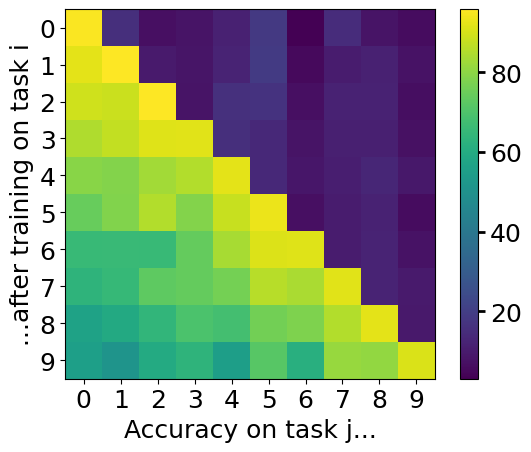

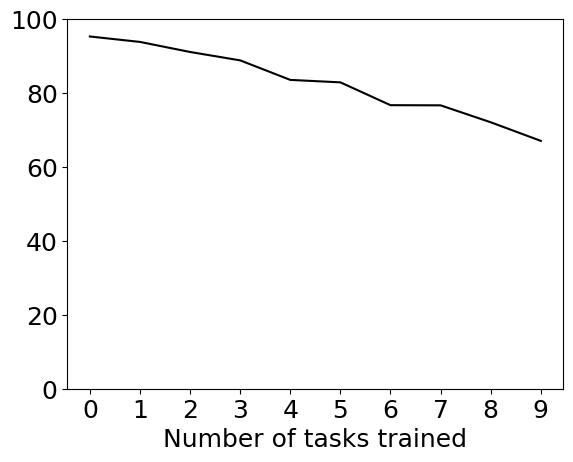

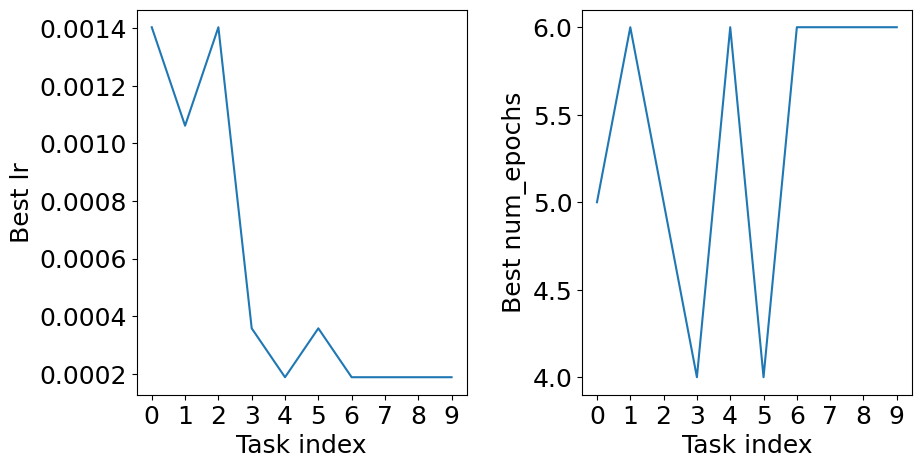

In [8]:
visualize_HPO(test_accs_matrix, best_params_list, visualization_settings, HPO_settings, method_settings, benchmark_settings)

## Validate

In [9]:
val_accs_matrix = validate(HPO_settings, benchmarks_list, benchmark_settings, method_settings, best_params_list, device, global_seed)


BENCHMARK 0

--------------------------------------------------
LEARNING TASK 1


  0%|                                                                                                                                | 0/5 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 20%|████████████████████████                                                                                                | 1/5 [00:02<00:08,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 40%|████████████████████████████████████████████████                                                                        | 2/5 [00:04<00:06,  2.09s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 60%|████████████████████████████████████████████████████████████████████████                                                | 3/5 [00:06<00:04,  2.09s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 80%|████████████████████████████████████████████████████████████████████████████████████████████████                        | 4/5 [00:08<00:02,  2.09s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.09s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.09s/it]


--------------------------------------------------
LEARNING TASK 2


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.09s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 240
fc2 : in = 240, out = 200
fc3 : in = 200, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 240
fc2 : in = 240, out = 200
fc3 : in = 200, out = 10


 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.09s/it]

In and out sizes :
fc1 : in = 784, out = 240
fc2 : in = 240, out = 200
fc3 : in = 200, out = 10


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.09s/it]

In and out sizes :
fc1 : in = 784, out = 240
fc2 : in = 240, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.09s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.09s/it]


--------------------------------------------------
LEARNING TASK 3


  0%|                                                                                                                                | 0/5 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 240
fc2 : in = 240, out = 200
fc3 : in = 200, out = 10


 20%|████████████████████████                                                                                                | 1/5 [00:02<00:08,  2.08s/it]

In and out sizes :
fc1 : in = 784, out = 240
fc2 : in = 240, out = 200
fc3 : in = 200, out = 10


 40%|████████████████████████████████████████████████                                                                        | 2/5 [00:04<00:06,  2.08s/it]

In and out sizes :
fc1 : in = 784, out = 240
fc2 : in = 240, out = 200
fc3 : in = 200, out = 10


 60%|████████████████████████████████████████████████████████████████████████                                                | 3/5 [00:06<00:04,  2.09s/it]

In and out sizes :
fc1 : in = 784, out = 240
fc2 : in = 240, out = 200
fc3 : in = 200, out = 10


 80%|████████████████████████████████████████████████████████████████████████████████████████████████                        | 4/5 [00:08<00:02,  2.09s/it]

In and out sizes :
fc1 : in = 784, out = 363
fc2 : in = 363, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.10s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.10s/it]


--------------------------------------------------
LEARNING TASK 4


  0%|                                                                                                                                | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 363
fc2 : in = 363, out = 200
fc3 : in = 200, out = 10


 25%|██████████████████████████████                                                                                          | 1/4 [00:02<00:06,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 363
fc2 : in = 363, out = 200
fc3 : in = 200, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 2/4 [00:04<00:04,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 363
fc2 : in = 363, out = 200
fc3 : in = 200, out = 10


 75%|██████████████████████████████████████████████████████████████████████████████████████████                              | 3/4 [00:06<00:02,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 363
fc2 : in = 363, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.11s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.11s/it]


--------------------------------------------------
LEARNING TASK 5


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 363
fc2 : in = 363, out = 200
fc3 : in = 200, out = 10


 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 363
fc2 : in = 363, out = 200
fc3 : in = 200, out = 10


 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 363
fc2 : in = 363, out = 200
fc3 : in = 200, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 363
fc2 : in = 363, out = 200
fc3 : in = 200, out = 10


 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 363
fc2 : in = 363, out = 200
fc3 : in = 200, out = 10


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 363
fc2 : in = 363, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.11s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.11s/it]


--------------------------------------------------
LEARNING TASK 6


  0%|                                                                                                                                | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 363
fc2 : in = 363, out = 200
fc3 : in = 200, out = 10


 25%|██████████████████████████████                                                                                          | 1/4 [00:02<00:06,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 363
fc2 : in = 363, out = 200
fc3 : in = 200, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 2/4 [00:04<00:04,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 363
fc2 : in = 363, out = 200
fc3 : in = 200, out = 10


 75%|██████████████████████████████████████████████████████████████████████████████████████████                              | 3/4 [00:06<00:02,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 363
fc2 : in = 363, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.11s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.11s/it]


--------------------------------------------------
LEARNING TASK 7


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 363
fc2 : in = 363, out = 200
fc3 : in = 200, out = 10


 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 363
fc2 : in = 363, out = 200
fc3 : in = 200, out = 10


 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 363
fc2 : in = 363, out = 200
fc3 : in = 200, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 363
fc2 : in = 363, out = 200
fc3 : in = 200, out = 10


 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 363
fc2 : in = 363, out = 200
fc3 : in = 200, out = 10


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 363
fc2 : in = 363, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.11s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.11s/it]


--------------------------------------------------
LEARNING TASK 8


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 363
fc2 : in = 363, out = 200
fc3 : in = 200, out = 10


 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 363
fc2 : in = 363, out = 200
fc3 : in = 200, out = 10


 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 363
fc2 : in = 363, out = 200
fc3 : in = 200, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 363
fc2 : in = 363, out = 200
fc3 : in = 200, out = 10


 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 363
fc2 : in = 363, out = 200
fc3 : in = 200, out = 10


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 363
fc2 : in = 363, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.11s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.11s/it]


--------------------------------------------------
LEARNING TASK 9


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 363
fc2 : in = 363, out = 200
fc3 : in = 200, out = 10


 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.12s/it]

In and out sizes :
fc1 : in = 784, out = 363
fc2 : in = 363, out = 200
fc3 : in = 200, out = 10


 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.13s/it]

In and out sizes :
fc1 : in = 784, out = 363
fc2 : in = 363, out = 200
fc3 : in = 200, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.13s/it]

In and out sizes :
fc1 : in = 784, out = 363
fc2 : in = 363, out = 200
fc3 : in = 200, out = 10


 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.13s/it]

In and out sizes :
fc1 : in = 784, out = 363
fc2 : in = 363, out = 200
fc3 : in = 200, out = 10


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.13s/it]

In and out sizes :
fc1 : in = 784, out = 363
fc2 : in = 363, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.13s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.13s/it]


--------------------------------------------------
LEARNING TASK 10


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 363
fc2 : in = 363, out = 200
fc3 : in = 200, out = 10


 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.13s/it]

In and out sizes :
fc1 : in = 784, out = 363
fc2 : in = 363, out = 200
fc3 : in = 200, out = 10


 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.13s/it]

In and out sizes :
fc1 : in = 784, out = 363
fc2 : in = 363, out = 200
fc3 : in = 200, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.12s/it]

In and out sizes :
fc1 : in = 784, out = 363
fc2 : in = 363, out = 200
fc3 : in = 200, out = 10


 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.12s/it]

In and out sizes :
fc1 : in = 784, out = 363
fc2 : in = 363, out = 200
fc3 : in = 200, out = 10


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.12s/it]

In and out sizes :
fc1 : in = 784, out = 363
fc2 : in = 363, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.12s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.12s/it]


BENCHMARK 1

--------------------------------------------------
LEARNING TASK 1


  0%|                                                                                                                                | 0/5 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 20%|████████████████████████                                                                                                | 1/5 [00:02<00:08,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 40%|████████████████████████████████████████████████                                                                        | 2/5 [00:04<00:06,  2.09s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 60%|████████████████████████████████████████████████████████████████████████                                                | 3/5 [00:06<00:04,  2.09s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 80%|████████████████████████████████████████████████████████████████████████████████████████████████                        | 4/5 [00:08<00:02,  2.09s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.08s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.09s/it]


--------------------------------------------------
LEARNING TASK 2


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.10s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.10s/it]


--------------------------------------------------
LEARNING TASK 3


  0%|                                                                                                                                | 0/5 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 279
fc2 : in = 279, out = 200
fc3 : in = 200, out = 10


 20%|████████████████████████                                                                                                | 1/5 [00:02<00:08,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 279
fc2 : in = 279, out = 200
fc3 : in = 200, out = 10


 40%|████████████████████████████████████████████████                                                                        | 2/5 [00:04<00:06,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 279
fc2 : in = 279, out = 200
fc3 : in = 200, out = 10


 60%|████████████████████████████████████████████████████████████████████████                                                | 3/5 [00:06<00:04,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 279
fc2 : in = 279, out = 200
fc3 : in = 200, out = 10


 80%|████████████████████████████████████████████████████████████████████████████████████████████████                        | 4/5 [00:08<00:02,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 279
fc2 : in = 279, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.11s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.11s/it]


--------------------------------------------------
LEARNING TASK 4


  0%|                                                                                                                                | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 384
fc2 : in = 384, out = 200
fc3 : in = 200, out = 10


 25%|██████████████████████████████                                                                                          | 1/4 [00:02<00:06,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 384
fc2 : in = 384, out = 200
fc3 : in = 200, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 2/4 [00:04<00:04,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 384
fc2 : in = 384, out = 200
fc3 : in = 200, out = 10


 75%|██████████████████████████████████████████████████████████████████████████████████████████                              | 3/4 [00:06<00:02,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 384
fc2 : in = 384, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.10s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.10s/it]


--------------------------------------------------
LEARNING TASK 5


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 384
fc2 : in = 384, out = 200
fc3 : in = 200, out = 10


 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.12s/it]

In and out sizes :
fc1 : in = 784, out = 384
fc2 : in = 384, out = 200
fc3 : in = 200, out = 10


 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 384
fc2 : in = 384, out = 200
fc3 : in = 200, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 587
fc2 : in = 587, out = 200
fc3 : in = 200, out = 10


 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 587
fc2 : in = 587, out = 200
fc3 : in = 200, out = 10


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 587
fc2 : in = 587, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.11s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.11s/it]


--------------------------------------------------
LEARNING TASK 6


  0%|                                                                                                                                | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 587
fc2 : in = 587, out = 200
fc3 : in = 200, out = 10


 25%|██████████████████████████████                                                                                          | 1/4 [00:02<00:06,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 587
fc2 : in = 587, out = 200
fc3 : in = 200, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 2/4 [00:04<00:04,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 587
fc2 : in = 587, out = 200
fc3 : in = 200, out = 10


 75%|██████████████████████████████████████████████████████████████████████████████████████████                              | 3/4 [00:06<00:02,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 587
fc2 : in = 587, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.11s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.11s/it]


--------------------------------------------------
LEARNING TASK 7


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 587
fc2 : in = 587, out = 200
fc3 : in = 200, out = 10


 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 587
fc2 : in = 587, out = 200
fc3 : in = 200, out = 10


 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 587
fc2 : in = 587, out = 200
fc3 : in = 200, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 587
fc2 : in = 587, out = 200
fc3 : in = 200, out = 10


 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 587
fc2 : in = 587, out = 200
fc3 : in = 200, out = 10


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 587
fc2 : in = 587, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.11s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.11s/it]


--------------------------------------------------
LEARNING TASK 8


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 587
fc2 : in = 587, out = 200
fc3 : in = 200, out = 10


 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 587
fc2 : in = 587, out = 200
fc3 : in = 200, out = 10


 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 587
fc2 : in = 587, out = 200
fc3 : in = 200, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 587
fc2 : in = 587, out = 200
fc3 : in = 200, out = 10


 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.12s/it]

In and out sizes :
fc1 : in = 784, out = 830
fc2 : in = 830, out = 200
fc3 : in = 200, out = 10


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 830
fc2 : in = 830, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.11s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.11s/it]


--------------------------------------------------
LEARNING TASK 9


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 830
fc2 : in = 830, out = 200
fc3 : in = 200, out = 10


 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 830
fc2 : in = 830, out = 200
fc3 : in = 200, out = 10


 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.09s/it]

In and out sizes :
fc1 : in = 784, out = 830
fc2 : in = 830, out = 200
fc3 : in = 200, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.09s/it]

In and out sizes :
fc1 : in = 784, out = 830
fc2 : in = 830, out = 200
fc3 : in = 200, out = 10


 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.09s/it]

In and out sizes :
fc1 : in = 784, out = 830
fc2 : in = 830, out = 200
fc3 : in = 200, out = 10


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.09s/it]

In and out sizes :
fc1 : in = 784, out = 830
fc2 : in = 830, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.09s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.09s/it]


--------------------------------------------------
LEARNING TASK 10


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 830
fc2 : in = 830, out = 200
fc3 : in = 200, out = 10


 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 830
fc2 : in = 830, out = 200
fc3 : in = 200, out = 10


 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 830
fc2 : in = 830, out = 200
fc3 : in = 200, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 830
fc2 : in = 830, out = 200
fc3 : in = 200, out = 10


 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 830
fc2 : in = 830, out = 200
fc3 : in = 200, out = 10


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 1336
fc2 : in = 1336, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.10s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.10s/it]


BENCHMARK 2

--------------------------------------------------
LEARNING TASK 1


  0%|                                                                                                                                | 0/5 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 20%|████████████████████████                                                                                                | 1/5 [00:02<00:08,  2.07s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 40%|████████████████████████████████████████████████                                                                        | 2/5 [00:04<00:06,  2.06s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 60%|████████████████████████████████████████████████████████████████████████                                                | 3/5 [00:06<00:04,  2.07s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 80%|████████████████████████████████████████████████████████████████████████████████████████████████                        | 4/5 [00:08<00:02,  2.08s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.08s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.08s/it]


--------------------------------------------------
LEARNING TASK 2


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.10s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.10s/it]


--------------------------------------------------
LEARNING TASK 3


  0%|                                                                                                                                | 0/5 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 20%|████████████████████████                                                                                                | 1/5 [00:02<00:08,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 40%|████████████████████████████████████████████████                                                                        | 2/5 [00:04<00:06,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 60%|████████████████████████████████████████████████████████████████████████                                                | 3/5 [00:06<00:04,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 80%|████████████████████████████████████████████████████████████████████████████████████████████████                        | 4/5 [00:08<00:02,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.12s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.11s/it]


--------------------------------------------------
LEARNING TASK 4


  0%|                                                                                                                                | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 212
fc2 : in = 212, out = 200
fc3 : in = 200, out = 10


 25%|██████████████████████████████                                                                                          | 1/4 [00:02<00:06,  2.08s/it]

In and out sizes :
fc1 : in = 784, out = 212
fc2 : in = 212, out = 200
fc3 : in = 200, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 2/4 [00:04<00:04,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 212
fc2 : in = 212, out = 200
fc3 : in = 200, out = 10


 75%|██████████████████████████████████████████████████████████████████████████████████████████                              | 3/4 [00:06<00:02,  2.09s/it]

In and out sizes :
fc1 : in = 784, out = 212
fc2 : in = 212, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.09s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.09s/it]


--------------------------------------------------
LEARNING TASK 5


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 212
fc2 : in = 212, out = 200
fc3 : in = 200, out = 10


 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 212
fc2 : in = 212, out = 200
fc3 : in = 200, out = 10


 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.09s/it]

In and out sizes :
fc1 : in = 784, out = 212
fc2 : in = 212, out = 200
fc3 : in = 200, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.09s/it]

In and out sizes :
fc1 : in = 784, out = 212
fc2 : in = 212, out = 200
fc3 : in = 200, out = 10


 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 246
fc2 : in = 246, out = 200
fc3 : in = 200, out = 10


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 246
fc2 : in = 246, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.11s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.11s/it]


--------------------------------------------------
LEARNING TASK 6


  0%|                                                                                                                                | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 246
fc2 : in = 246, out = 200
fc3 : in = 200, out = 10


 25%|██████████████████████████████                                                                                          | 1/4 [00:02<00:06,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 246
fc2 : in = 246, out = 200
fc3 : in = 200, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 2/4 [00:04<00:04,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 246
fc2 : in = 246, out = 200
fc3 : in = 200, out = 10


 75%|██████████████████████████████████████████████████████████████████████████████████████████                              | 3/4 [00:06<00:02,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 246
fc2 : in = 246, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.11s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.11s/it]


--------------------------------------------------
LEARNING TASK 7


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 246
fc2 : in = 246, out = 200
fc3 : in = 200, out = 10


 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 246
fc2 : in = 246, out = 200
fc3 : in = 200, out = 10


 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 246
fc2 : in = 246, out = 200
fc3 : in = 200, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 246
fc2 : in = 246, out = 200
fc3 : in = 200, out = 10


 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 246
fc2 : in = 246, out = 200
fc3 : in = 200, out = 10


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 246
fc2 : in = 246, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.11s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.11s/it]


--------------------------------------------------
LEARNING TASK 8


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 246
fc2 : in = 246, out = 200
fc3 : in = 200, out = 10


 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 246
fc2 : in = 246, out = 200
fc3 : in = 200, out = 10


 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 246
fc2 : in = 246, out = 200
fc3 : in = 200, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 246
fc2 : in = 246, out = 200
fc3 : in = 200, out = 10


 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.12s/it]

In and out sizes :
fc1 : in = 784, out = 246
fc2 : in = 246, out = 200
fc3 : in = 200, out = 10


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.12s/it]

In and out sizes :
fc1 : in = 784, out = 397
fc2 : in = 397, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.12s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.12s/it]


--------------------------------------------------
LEARNING TASK 9


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 397
fc2 : in = 397, out = 200
fc3 : in = 200, out = 10


 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 397
fc2 : in = 397, out = 200
fc3 : in = 200, out = 10


 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 397
fc2 : in = 397, out = 200
fc3 : in = 200, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 397
fc2 : in = 397, out = 200
fc3 : in = 200, out = 10


 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 397
fc2 : in = 397, out = 200
fc3 : in = 200, out = 10


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 397
fc2 : in = 397, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.11s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.11s/it]


--------------------------------------------------
LEARNING TASK 10


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 635
fc2 : in = 635, out = 200
fc3 : in = 200, out = 10


 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.12s/it]

In and out sizes :
fc1 : in = 784, out = 635
fc2 : in = 635, out = 200
fc3 : in = 200, out = 10


 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.12s/it]

In and out sizes :
fc1 : in = 784, out = 1089
fc2 : in = 1089, out = 200
fc3 : in = 200, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.12s/it]

In and out sizes :
fc1 : in = 784, out = 1089
fc2 : in = 1089, out = 200
fc3 : in = 200, out = 10


 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.12s/it]

In and out sizes :
fc1 : in = 784, out = 1089
fc2 : in = 1089, out = 200
fc3 : in = 200, out = 10


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 1089
fc2 : in = 1089, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.10s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.11s/it]


BENCHMARK 3

--------------------------------------------------
LEARNING TASK 1


  0%|                                                                                                                                | 0/5 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 20%|████████████████████████                                                                                                | 1/5 [00:02<00:08,  2.08s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 40%|████████████████████████████████████████████████                                                                        | 2/5 [00:04<00:06,  2.08s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 60%|████████████████████████████████████████████████████████████████████████                                                | 3/5 [00:06<00:04,  2.07s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 80%|████████████████████████████████████████████████████████████████████████████████████████████████                        | 4/5 [00:08<00:02,  2.08s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.08s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.08s/it]


--------------------------------------------------
LEARNING TASK 2


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 264
fc2 : in = 264, out = 200
fc3 : in = 200, out = 10


 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 264
fc2 : in = 264, out = 256
fc3 : in = 256, out = 10


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 264
fc2 : in = 264, out = 256
fc3 : in = 256, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.09s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.10s/it]


--------------------------------------------------
LEARNING TASK 3


  0%|                                                                                                                                | 0/5 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 264
fc2 : in = 264, out = 256
fc3 : in = 256, out = 10


 20%|████████████████████████                                                                                                | 1/5 [00:02<00:08,  2.09s/it]

In and out sizes :
fc1 : in = 784, out = 264
fc2 : in = 264, out = 256
fc3 : in = 256, out = 10


 40%|████████████████████████████████████████████████                                                                        | 2/5 [00:04<00:06,  2.09s/it]

In and out sizes :
fc1 : in = 784, out = 264
fc2 : in = 264, out = 256
fc3 : in = 256, out = 10


 60%|████████████████████████████████████████████████████████████████████████                                                | 3/5 [00:06<00:04,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 386
fc2 : in = 386, out = 256
fc3 : in = 256, out = 10


 80%|████████████████████████████████████████████████████████████████████████████████████████████████                        | 4/5 [00:08<00:02,  2.09s/it]

In and out sizes :
fc1 : in = 784, out = 386
fc2 : in = 386, out = 256
fc3 : in = 256, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.10s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.09s/it]


--------------------------------------------------
LEARNING TASK 4


  0%|                                                                                                                                | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 386
fc2 : in = 386, out = 336
fc3 : in = 336, out = 10


 25%|██████████████████████████████                                                                                          | 1/4 [00:02<00:06,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 386
fc2 : in = 386, out = 336
fc3 : in = 336, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 2/4 [00:04<00:04,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 386
fc2 : in = 386, out = 336
fc3 : in = 336, out = 10


 75%|██████████████████████████████████████████████████████████████████████████████████████████                              | 3/4 [00:06<00:02,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 386
fc2 : in = 386, out = 336
fc3 : in = 336, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.10s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.10s/it]


--------------------------------------------------
LEARNING TASK 5


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 386
fc2 : in = 386, out = 336
fc3 : in = 336, out = 10


 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 386
fc2 : in = 386, out = 336
fc3 : in = 336, out = 10


 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 386
fc2 : in = 386, out = 336
fc3 : in = 336, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 386
fc2 : in = 386, out = 336
fc3 : in = 336, out = 10


 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 386
fc2 : in = 386, out = 336
fc3 : in = 336, out = 10


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 386
fc2 : in = 386, out = 336
fc3 : in = 336, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.11s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.11s/it]


--------------------------------------------------
LEARNING TASK 6


  0%|                                                                                                                                | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 386
fc2 : in = 386, out = 336
fc3 : in = 336, out = 10


 25%|██████████████████████████████                                                                                          | 1/4 [00:02<00:06,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 386
fc2 : in = 386, out = 336
fc3 : in = 336, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 2/4 [00:04<00:04,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 386
fc2 : in = 386, out = 336
fc3 : in = 336, out = 10


 75%|██████████████████████████████████████████████████████████████████████████████████████████                              | 3/4 [00:06<00:02,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 386
fc2 : in = 386, out = 336
fc3 : in = 336, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.11s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.11s/it]


--------------------------------------------------
LEARNING TASK 7


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 386
fc2 : in = 386, out = 336
fc3 : in = 336, out = 10


 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 386
fc2 : in = 386, out = 336
fc3 : in = 336, out = 10


 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 386
fc2 : in = 386, out = 336
fc3 : in = 336, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 386
fc2 : in = 386, out = 336
fc3 : in = 336, out = 10


 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 386
fc2 : in = 386, out = 336
fc3 : in = 336, out = 10


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 386
fc2 : in = 386, out = 336
fc3 : in = 336, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.11s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.11s/it]


--------------------------------------------------
LEARNING TASK 8


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 386
fc2 : in = 386, out = 336
fc3 : in = 336, out = 10


 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.12s/it]

In and out sizes :
fc1 : in = 784, out = 648
fc2 : in = 648, out = 336
fc3 : in = 336, out = 10


 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 648
fc2 : in = 648, out = 336
fc3 : in = 336, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 648
fc2 : in = 648, out = 336
fc3 : in = 336, out = 10


 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 648
fc2 : in = 648, out = 336
fc3 : in = 336, out = 10


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 648
fc2 : in = 648, out = 336
fc3 : in = 336, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.10s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.11s/it]


--------------------------------------------------
LEARNING TASK 9


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 648
fc2 : in = 648, out = 336
fc3 : in = 336, out = 10


 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 648
fc2 : in = 648, out = 336
fc3 : in = 336, out = 10


 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 648
fc2 : in = 648, out = 336
fc3 : in = 336, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 648
fc2 : in = 648, out = 336
fc3 : in = 336, out = 10


 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 648
fc2 : in = 648, out = 336
fc3 : in = 336, out = 10


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 648
fc2 : in = 648, out = 336
fc3 : in = 336, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.10s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.10s/it]


--------------------------------------------------
LEARNING TASK 10


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 648
fc2 : in = 648, out = 336
fc3 : in = 336, out = 10


 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 648
fc2 : in = 648, out = 336
fc3 : in = 336, out = 10


 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 648
fc2 : in = 648, out = 336
fc3 : in = 336, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 648
fc2 : in = 648, out = 336
fc3 : in = 336, out = 10


 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 648
fc2 : in = 648, out = 336
fc3 : in = 336, out = 10


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 972
fc2 : in = 972, out = 336
fc3 : in = 336, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.11s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.11s/it]


BENCHMARK 4

--------------------------------------------------
LEARNING TASK 1


  0%|                                                                                                                                | 0/5 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 20%|████████████████████████                                                                                                | 1/5 [00:02<00:08,  2.09s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 40%|████████████████████████████████████████████████                                                                        | 2/5 [00:04<00:06,  2.08s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 60%|████████████████████████████████████████████████████████████████████████                                                | 3/5 [00:06<00:04,  2.08s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 80%|████████████████████████████████████████████████████████████████████████████████████████████████                        | 4/5 [00:08<00:02,  2.08s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.08s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.08s/it]


--------------------------------------------------
LEARNING TASK 2


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.07s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.07s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.07s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.07s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.07s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.07s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.07s/it]


--------------------------------------------------
LEARNING TASK 3


  0%|                                                                                                                                | 0/5 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 20%|████████████████████████                                                                                                | 1/5 [00:02<00:08,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 271
fc2 : in = 271, out = 200
fc3 : in = 200, out = 10


 40%|████████████████████████████████████████████████                                                                        | 2/5 [00:04<00:06,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 271
fc2 : in = 271, out = 200
fc3 : in = 200, out = 10


 60%|████████████████████████████████████████████████████████████████████████                                                | 3/5 [00:06<00:04,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 271
fc2 : in = 271, out = 200
fc3 : in = 200, out = 10


 80%|████████████████████████████████████████████████████████████████████████████████████████████████                        | 4/5 [00:08<00:02,  2.09s/it]

In and out sizes :
fc1 : in = 784, out = 271
fc2 : in = 271, out = 279
fc3 : in = 279, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.09s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.09s/it]


--------------------------------------------------
LEARNING TASK 4


  0%|                                                                                                                                | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 271
fc2 : in = 271, out = 279
fc3 : in = 279, out = 10


 25%|██████████████████████████████                                                                                          | 1/4 [00:02<00:06,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 271
fc2 : in = 271, out = 279
fc3 : in = 279, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 2/4 [00:04<00:04,  2.09s/it]

In and out sizes :
fc1 : in = 784, out = 271
fc2 : in = 271, out = 279
fc3 : in = 279, out = 10


 75%|██████████████████████████████████████████████████████████████████████████████████████████                              | 3/4 [00:06<00:02,  2.09s/it]

In and out sizes :
fc1 : in = 784, out = 271
fc2 : in = 271, out = 279
fc3 : in = 279, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.09s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.09s/it]


--------------------------------------------------
LEARNING TASK 5


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 271
fc2 : in = 271, out = 279
fc3 : in = 279, out = 10


 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 271
fc2 : in = 271, out = 279
fc3 : in = 279, out = 10


 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 443
fc2 : in = 443, out = 279
fc3 : in = 279, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 443
fc2 : in = 443, out = 279
fc3 : in = 279, out = 10


 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 443
fc2 : in = 443, out = 279
fc3 : in = 279, out = 10


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.09s/it]

In and out sizes :
fc1 : in = 784, out = 443
fc2 : in = 443, out = 279
fc3 : in = 279, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.09s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.10s/it]


--------------------------------------------------
LEARNING TASK 6


  0%|                                                                                                                                | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 443
fc2 : in = 443, out = 279
fc3 : in = 279, out = 10


 25%|██████████████████████████████                                                                                          | 1/4 [00:02<00:06,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 443
fc2 : in = 443, out = 279
fc3 : in = 279, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 2/4 [00:04<00:04,  2.09s/it]

In and out sizes :
fc1 : in = 784, out = 443
fc2 : in = 443, out = 279
fc3 : in = 279, out = 10


 75%|██████████████████████████████████████████████████████████████████████████████████████████                              | 3/4 [00:06<00:02,  2.09s/it]

In and out sizes :
fc1 : in = 784, out = 443
fc2 : in = 443, out = 279
fc3 : in = 279, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.10s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.10s/it]


--------------------------------------------------
LEARNING TASK 7


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 443
fc2 : in = 443, out = 279
fc3 : in = 279, out = 10


 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 443
fc2 : in = 443, out = 279
fc3 : in = 279, out = 10


 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 443
fc2 : in = 443, out = 279
fc3 : in = 279, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 443
fc2 : in = 443, out = 279
fc3 : in = 279, out = 10


 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 443
fc2 : in = 443, out = 279
fc3 : in = 279, out = 10


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 443
fc2 : in = 443, out = 279
fc3 : in = 279, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.10s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.10s/it]


--------------------------------------------------
LEARNING TASK 8


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 443
fc2 : in = 443, out = 279
fc3 : in = 279, out = 10


 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.12s/it]

In and out sizes :
fc1 : in = 784, out = 443
fc2 : in = 443, out = 279
fc3 : in = 279, out = 10


 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 443
fc2 : in = 443, out = 279
fc3 : in = 279, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 443
fc2 : in = 443, out = 279
fc3 : in = 279, out = 10


 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 443
fc2 : in = 443, out = 279
fc3 : in = 279, out = 10


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 688
fc2 : in = 688, out = 279
fc3 : in = 279, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.11s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.11s/it]


--------------------------------------------------
LEARNING TASK 9


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 688
fc2 : in = 688, out = 279
fc3 : in = 279, out = 10


 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 688
fc2 : in = 688, out = 279
fc3 : in = 279, out = 10


 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 688
fc2 : in = 688, out = 279
fc3 : in = 279, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 1235
fc2 : in = 1235, out = 279
fc3 : in = 279, out = 10


 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 1235
fc2 : in = 1235, out = 279
fc3 : in = 279, out = 10


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 1235
fc2 : in = 1235, out = 279
fc3 : in = 279, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.11s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.11s/it]


--------------------------------------------------
LEARNING TASK 10


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 1235
fc2 : in = 1235, out = 279
fc3 : in = 279, out = 10


 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 1235
fc2 : in = 1235, out = 279
fc3 : in = 279, out = 10


 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 1235
fc2 : in = 1235, out = 279
fc3 : in = 279, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 1235
fc2 : in = 1235, out = 279
fc3 : in = 279, out = 10


 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 1235
fc2 : in = 1235, out = 279
fc3 : in = 279, out = 10


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 1235
fc2 : in = 1235, out = 279
fc3 : in = 279, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.11s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.11s/it]


BENCHMARK 5

--------------------------------------------------
LEARNING TASK 1


  0%|                                                                                                                                | 0/5 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 20%|████████████████████████                                                                                                | 1/5 [00:02<00:08,  2.08s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 40%|████████████████████████████████████████████████                                                                        | 2/5 [00:04<00:06,  2.08s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 60%|████████████████████████████████████████████████████████████████████████                                                | 3/5 [00:06<00:04,  2.08s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 80%|████████████████████████████████████████████████████████████████████████████████████████████████                        | 4/5 [00:08<00:02,  2.08s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.08s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.08s/it]


--------------------------------------------------
LEARNING TASK 2


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 200
fc2 : in = 200, out = 200
fc3 : in = 200, out = 10


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.10s/it]

In and out sizes :
fc1 : in = 784, out = 229
fc2 : in = 229, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.10s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.10s/it]


--------------------------------------------------
LEARNING TASK 3


  0%|                                                                                                                                | 0/5 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 229
fc2 : in = 229, out = 200
fc3 : in = 200, out = 10


 20%|████████████████████████                                                                                                | 1/5 [00:02<00:08,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 229
fc2 : in = 229, out = 200
fc3 : in = 200, out = 10


 40%|████████████████████████████████████████████████                                                                        | 2/5 [00:04<00:06,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 229
fc2 : in = 229, out = 200
fc3 : in = 200, out = 10


 60%|████████████████████████████████████████████████████████████████████████                                                | 3/5 [00:06<00:04,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 229
fc2 : in = 229, out = 200
fc3 : in = 200, out = 10


 80%|████████████████████████████████████████████████████████████████████████████████████████████████                        | 4/5 [00:08<00:02,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 229
fc2 : in = 229, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.10s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.11s/it]


--------------------------------------------------
LEARNING TASK 4


  0%|                                                                                                                                | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 229
fc2 : in = 229, out = 200
fc3 : in = 200, out = 10


 25%|██████████████████████████████                                                                                          | 1/4 [00:02<00:06,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 229
fc2 : in = 229, out = 200
fc3 : in = 200, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 2/4 [00:04<00:04,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 229
fc2 : in = 229, out = 200
fc3 : in = 200, out = 10


 75%|██████████████████████████████████████████████████████████████████████████████████████████                              | 3/4 [00:06<00:02,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 229
fc2 : in = 229, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.11s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.11s/it]


--------------------------------------------------
LEARNING TASK 5


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 322
fc2 : in = 322, out = 200
fc3 : in = 200, out = 10


 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 322
fc2 : in = 322, out = 200
fc3 : in = 200, out = 10


 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.12s/it]

In and out sizes :
fc1 : in = 784, out = 484
fc2 : in = 484, out = 200
fc3 : in = 200, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 484
fc2 : in = 484, out = 200
fc3 : in = 200, out = 10


 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 484
fc2 : in = 484, out = 200
fc3 : in = 200, out = 10


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 484
fc2 : in = 484, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.11s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.11s/it]


--------------------------------------------------
LEARNING TASK 6


  0%|                                                                                                                                | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 484
fc2 : in = 484, out = 200
fc3 : in = 200, out = 10


 25%|██████████████████████████████                                                                                          | 1/4 [00:02<00:06,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 484
fc2 : in = 484, out = 200
fc3 : in = 200, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 2/4 [00:04<00:04,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 484
fc2 : in = 484, out = 200
fc3 : in = 200, out = 10


 75%|██████████████████████████████████████████████████████████████████████████████████████████                              | 3/4 [00:06<00:02,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 484
fc2 : in = 484, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.11s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.11s/it]


--------------------------------------------------
LEARNING TASK 7


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 484
fc2 : in = 484, out = 200
fc3 : in = 200, out = 10


 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 484
fc2 : in = 484, out = 200
fc3 : in = 200, out = 10


 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 484
fc2 : in = 484, out = 200
fc3 : in = 200, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 484
fc2 : in = 484, out = 200
fc3 : in = 200, out = 10


 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 484
fc2 : in = 484, out = 200
fc3 : in = 200, out = 10


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 484
fc2 : in = 484, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.11s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.11s/it]


--------------------------------------------------
LEARNING TASK 8


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 484
fc2 : in = 484, out = 200
fc3 : in = 200, out = 10


 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.12s/it]

In and out sizes :
fc1 : in = 784, out = 484
fc2 : in = 484, out = 200
fc3 : in = 200, out = 10


 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.12s/it]

In and out sizes :
fc1 : in = 784, out = 484
fc2 : in = 484, out = 200
fc3 : in = 200, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.12s/it]

In and out sizes :
fc1 : in = 784, out = 484
fc2 : in = 484, out = 200
fc3 : in = 200, out = 10


 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.12s/it]

In and out sizes :
fc1 : in = 784, out = 484
fc2 : in = 484, out = 200
fc3 : in = 200, out = 10


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 484
fc2 : in = 484, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.12s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.12s/it]


--------------------------------------------------
LEARNING TASK 9


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 484
fc2 : in = 484, out = 200
fc3 : in = 200, out = 10


 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.12s/it]

In and out sizes :
fc1 : in = 784, out = 484
fc2 : in = 484, out = 200
fc3 : in = 200, out = 10


 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.13s/it]

In and out sizes :
fc1 : in = 784, out = 824
fc2 : in = 824, out = 200
fc3 : in = 200, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.12s/it]

In and out sizes :
fc1 : in = 784, out = 824
fc2 : in = 824, out = 200
fc3 : in = 200, out = 10


 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.12s/it]

In and out sizes :
fc1 : in = 784, out = 824
fc2 : in = 824, out = 200
fc3 : in = 200, out = 10


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.12s/it]

In and out sizes :
fc1 : in = 784, out = 824
fc2 : in = 824, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.11s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.12s/it]


--------------------------------------------------
LEARNING TASK 10


  0%|                                                                                                                                | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 824
fc2 : in = 824, out = 200
fc3 : in = 200, out = 10


 17%|████████████████████                                                                                                    | 1/6 [00:02<00:10,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 824
fc2 : in = 824, out = 200
fc3 : in = 200, out = 10


 33%|████████████████████████████████████████                                                                                | 2/6 [00:04<00:08,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 824
fc2 : in = 824, out = 200
fc3 : in = 200, out = 10


 50%|████████████████████████████████████████████████████████████                                                            | 3/6 [00:06<00:06,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 824
fc2 : in = 824, out = 200
fc3 : in = 200, out = 10


 67%|████████████████████████████████████████████████████████████████████████████████                                        | 4/6 [00:08<00:04,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 824
fc2 : in = 824, out = 200
fc3 : in = 200, out = 10


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 5/6 [00:10<00:02,  2.11s/it]

In and out sizes :
fc1 : in = 784, out = 824
fc2 : in = 824, out = 200
fc3 : in = 200, out = 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.11s/it]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.11s/it]

## Visualize validation

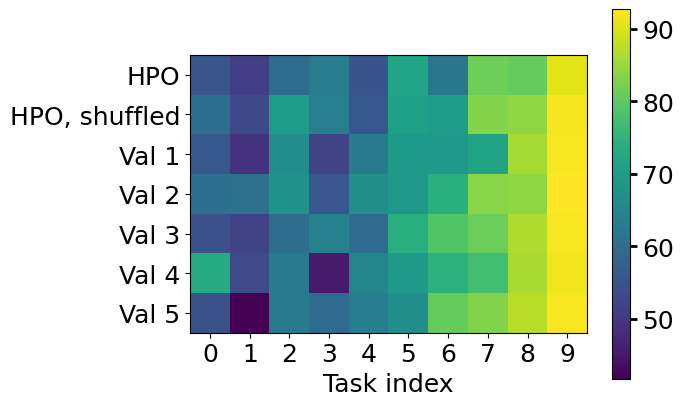

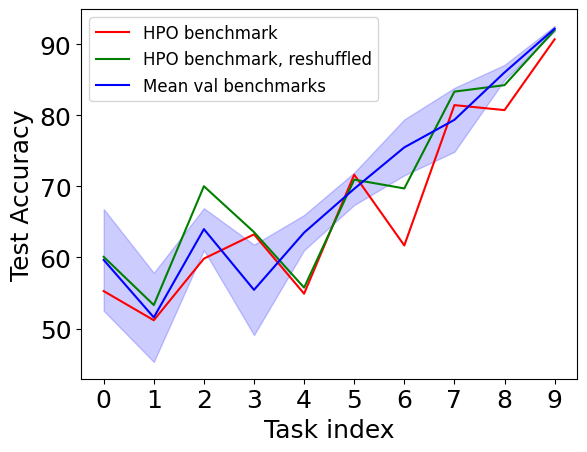

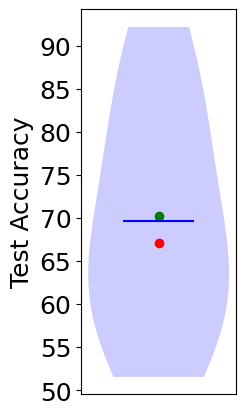

In [10]:
visualize_validation(val_accs_matrix, test_accs_matrix, visualization_settings, HPO_settings, method_settings, benchmark_settings)

## Save results matrices

In [11]:
if save_results :
    np.savetxt('Results/test_accs_matrix.csv', test_accs_matrix)
    np.savetxt('Results/val_accs_matrix.csv', val_accs_matrix)